In [25]:
## All import statements

import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

#### Read the data into a dataframe

In [4]:
inputfilename = "./dataset/cervical_vertebrae_measurement.csv"

cer_vert_df = pd.read_csv(inputfilename)

In [7]:
#cer_vert_df.head()
cer_vert_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   HorizontalLinear_A                 30 non-null     float64
 1   HorizontalLinear_B                 30 non-null     float64
 2   HorizontalLinear_C                 30 non-null     float64
 3   HorizontalLinear_D                 30 non-null     float64
 4   HorizontalLinear_E                 30 non-null     float64
 5   HorizontalLinear_F                 30 non-null     float64
 6   HorizontalLinear_G                 30 non-null     float64
 7   VerticalLinear_A                   30 non-null     float64
 8   VerticalLinear_B                   30 non-null     float64
 9   VerticalLinear_C                   30 non-null     float64
 10  VerticalLinear_D                   30 non-null     float64
 11  VerticalLinear_E                   30 non-null     float64
 

In [8]:
cer_vert_df.describe()

,HorizontalLinear_A,HorizontalLinear_B,HorizontalLinear_C,HorizontalLinear_D,HorizontalLinear_E,HorizontalLinear_F,HorizontalLinear_G,VerticalLinear_A,VerticalLinear_B,VerticalLinear_C,VerticalLinear_D,VerticalLinear_E,VerticalLinear_F,Vertebral_depth_X,Vertebral_depth_Y,Vertebral_depth_Z,growth_type_percentage_lowerbound,growth_type_percentage_upperbound
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,11.283333,11.216667,12.183333,11.216667,11.216667,11.683333,11.30000,10.350000,8.700000,9.133333,10.666667,8.733333,8.736667,1.750000,1.223333,1.053333,22.333333,41.833333
std,1.489523,1.406165,1.342176,1.304391,1.362574,1.380176,1.47157,1.952673,1.684616,1.865907,1.566532,1.324395,1.629784,2.023099,0.667307,0.694179,22.656861,28.812214
min,8.000000,8.500000,10.000000,8.000000,9.000000,10.000000,9.00000,5.000000,5.000000,7.000000,7.000000,6.000000,5.000000,0.200000,0.000000,0.000000,5.000000,10.000000
25%,10.000000,10.000000,11.000000,10.000000,10.000000,10.625000,10.00000,9.000000,8.000000,8.000000,10.000000,8.000000,8.000000,1.000000,1.000000,0.575000,10.000000,25.000000
50%,11.500000,11.000000,12.000000,11.250000,11.000000,11.500000,11.50000,10.000000,9.000000,8.500000,10.000000,9.000000,8.500000,1.500000,1.300000,1.200000,10.000000,25.000000
75%,12.000000,12.000000,13.000000,12.000000,12.000000,13.000000,12.75000,11.875000,9.875000,10.750000,11.875000,9.875000,10.000000,2.000000,1.950000,1.500000,25.000000,65.000000
max,14.000000,14.000000,15.000000,13.000000,14.500000,15.000000,14.00000,14.000000,11.500000,13.000000,14.000000,11.500000,12.000000,12.000000,2.000000,2.000000,85.000000,100.000000


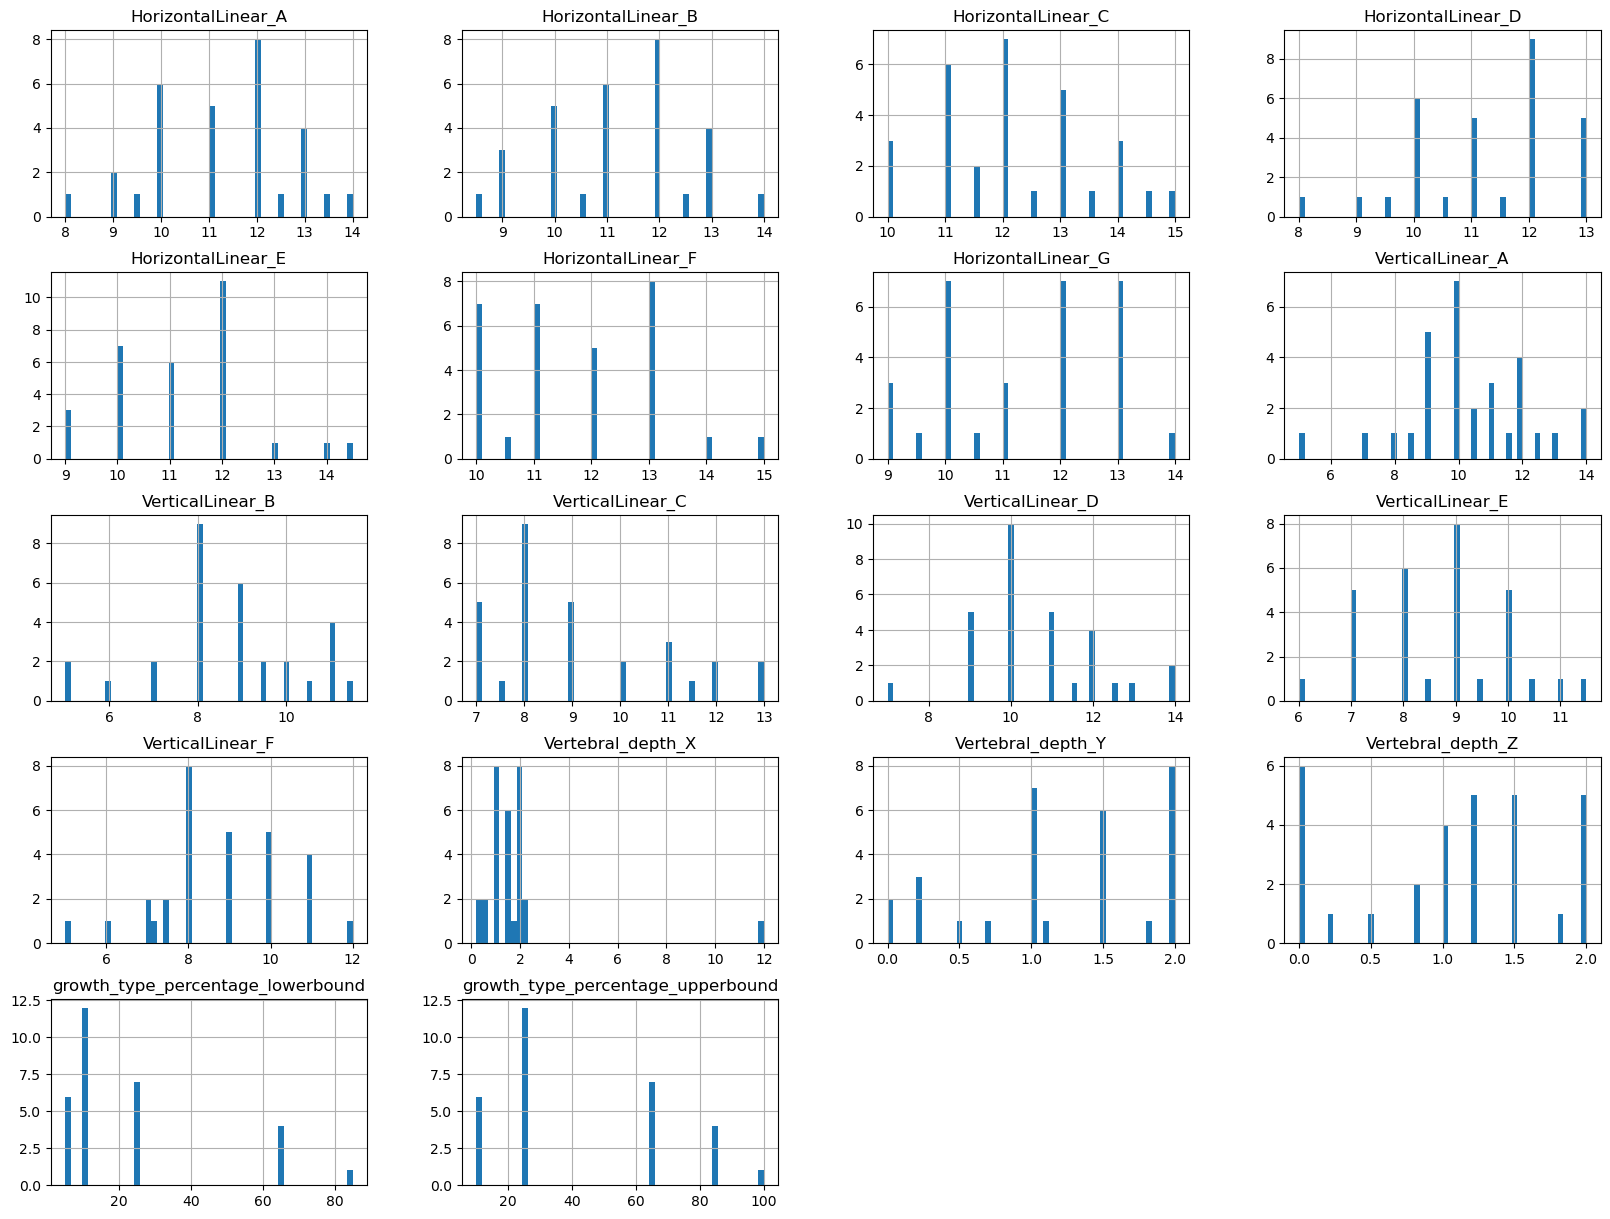

In [12]:
cer_vert_df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [14]:
cer_vert_df.columns

Index(['HorizontalLinear_A', 'HorizontalLinear_B', 'HorizontalLinear_C',
       'HorizontalLinear_D', 'HorizontalLinear_E', 'HorizontalLinear_F',
       'HorizontalLinear_G', 'VerticalLinear_A', 'VerticalLinear_B',
       'VerticalLinear_C', 'VerticalLinear_D', 'VerticalLinear_E',
       'VerticalLinear_F', 'Vertebral_depth_X', 'Vertebral_depth_Y',
       'Vertebral_depth_Z', 'growth_type_percentage_lowerbound',
       'growth_type_percentage_upperbound'],
      dtype='object')

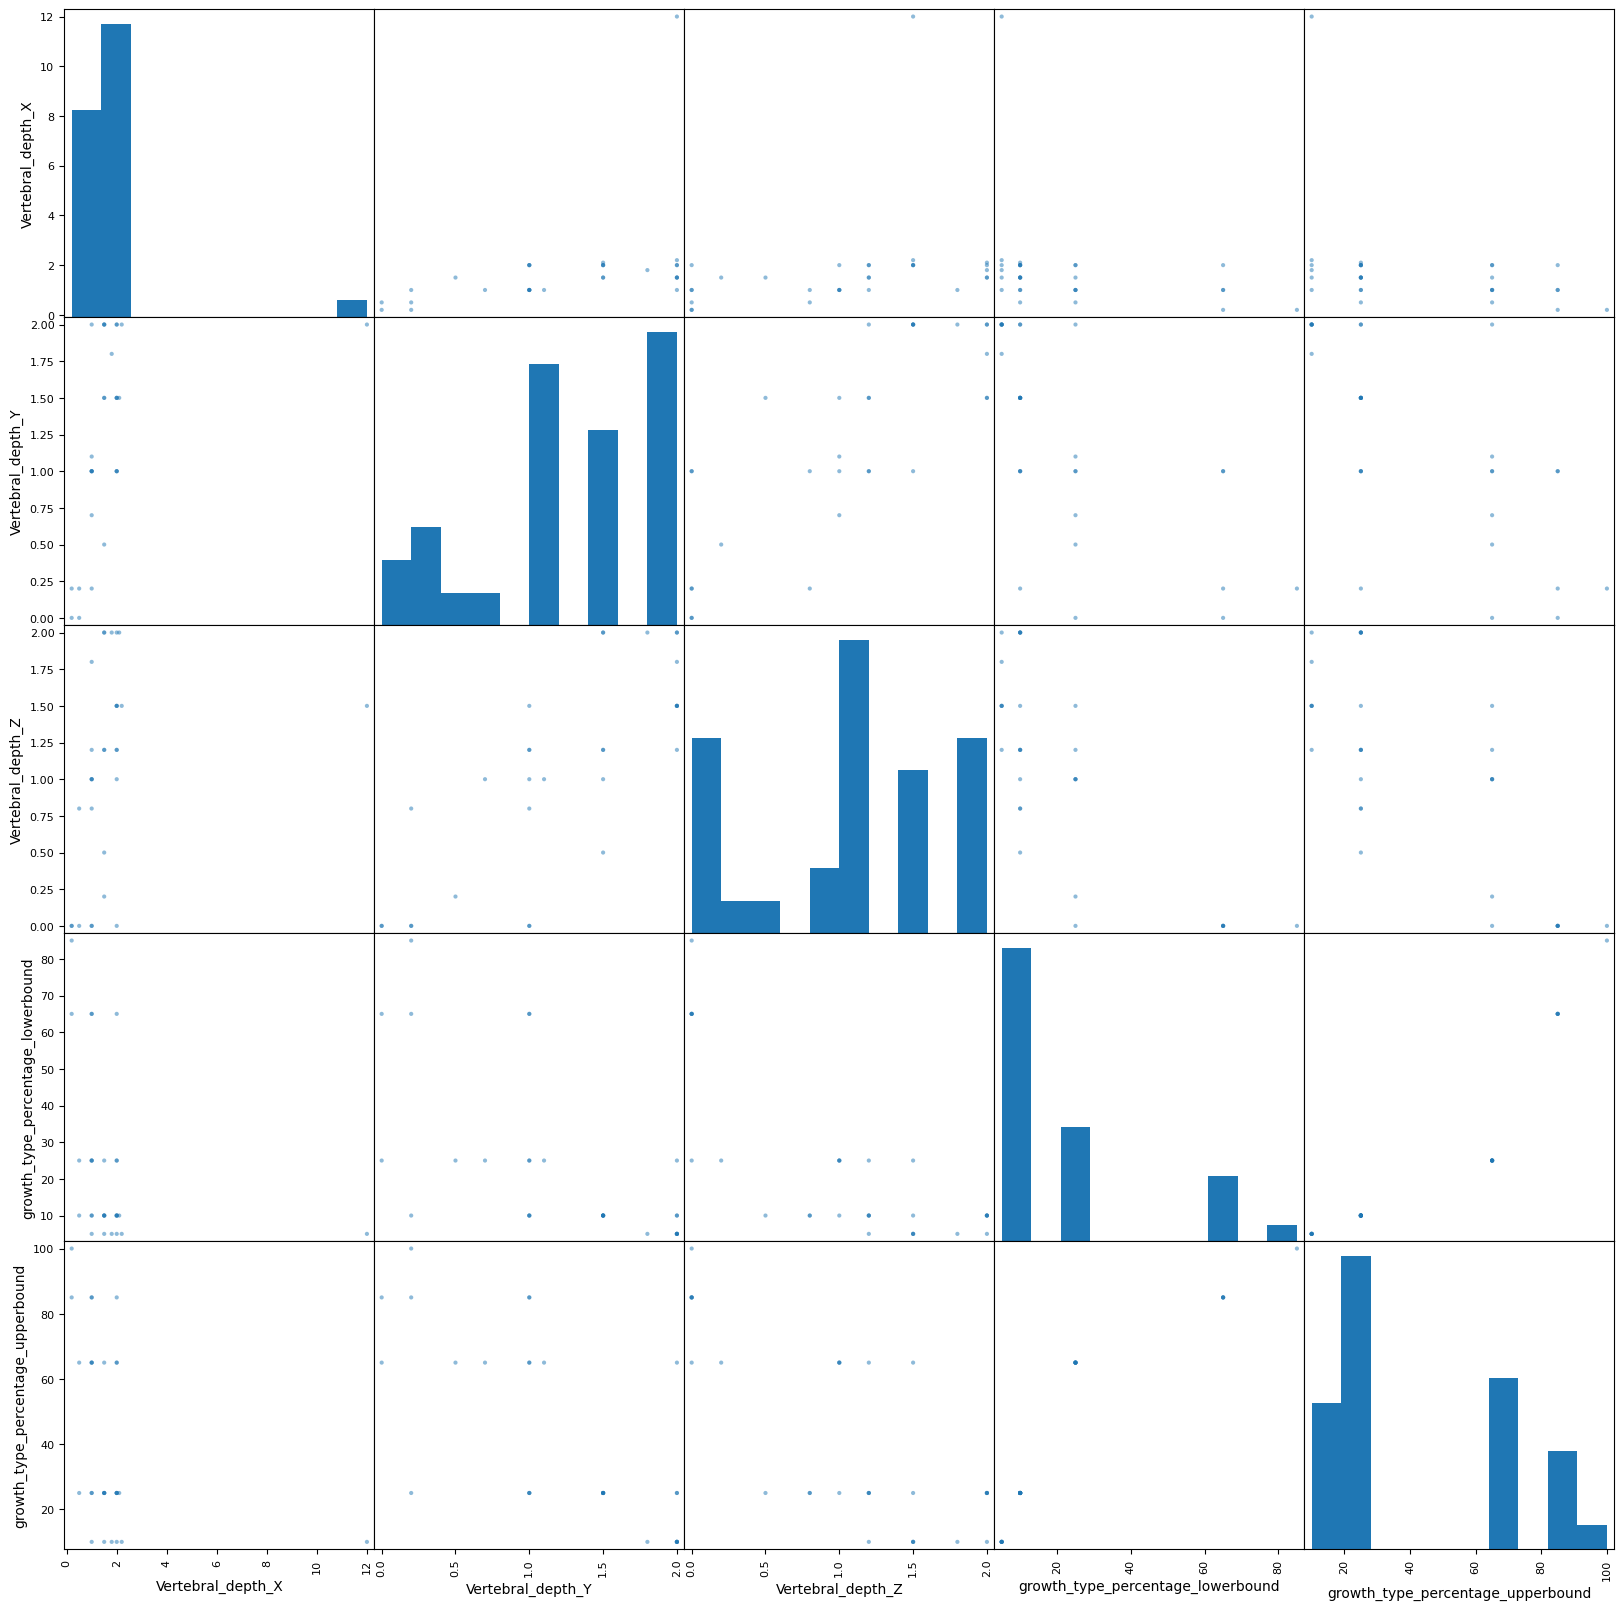

In [19]:
attributes = ['Vertebral_depth_X', 'Vertebral_depth_Y',
       'Vertebral_depth_Z', 'growth_type_percentage_lowerbound',
       'growth_type_percentage_upperbound']
scatter_matrix(cer_vert_df[attributes], figsize=(20, 20))
plt.savefig("scatter_matrix_plot")

In [23]:
corr_matrix = cer_vert_df.corr()
corr_matrix["growth_type_percentage_lowerbound"].sort_values(ascending=True)

Vertebral_depth_Z                   -0.764582
Vertebral_depth_Y                   -0.641193
VerticalLinear_F                    -0.595385
VerticalLinear_A                    -0.545206
VerticalLinear_C                    -0.488856
VerticalLinear_D                    -0.433957
HorizontalLinear_C                  -0.422773
HorizontalLinear_F                  -0.372538
HorizontalLinear_B                  -0.357355
HorizontalLinear_D                  -0.309395
Vertebral_depth_X                   -0.277595
VerticalLinear_E                    -0.262969
VerticalLinear_B                    -0.247544
HorizontalLinear_G                  -0.236324
HorizontalLinear_A                  -0.216957
HorizontalLinear_E                  -0.178902
growth_type_percentage_upperbound    0.911026
growth_type_percentage_lowerbound    1.000000
Name: growth_type_percentage_lowerbound, dtype: float64

In [22]:
corr_matrix["growth_type_percentage_upperbound"].sort_values(ascending=True)

Vertebral_depth_Z                   -0.755888
Vertebral_depth_Y                   -0.709834
VerticalLinear_F                    -0.621996
VerticalLinear_C                    -0.606025
VerticalLinear_A                    -0.549626
VerticalLinear_D                    -0.450116
HorizontalLinear_C                  -0.354523
HorizontalLinear_B                  -0.344206
Vertebral_depth_X                   -0.333795
VerticalLinear_B                    -0.320406
HorizontalLinear_F                  -0.316580
HorizontalLinear_D                  -0.283897
VerticalLinear_E                    -0.282697
HorizontalLinear_G                  -0.208608
HorizontalLinear_A                  -0.139070
HorizontalLinear_E                  -0.096106
growth_type_percentage_lowerbound    0.911026
growth_type_percentage_upperbound    1.000000
Name: growth_type_percentage_upperbound, dtype: float64

standard_scaler = StandardScaler()
cer_vert_scaled_df = pd.DataFrame(standard_scaler.fit_transform(cer_vert_df),columns = cer_vert_df.columns)


In [27]:
cer_vert_scaled_df.describe()

,HorizontalLinear_A,HorizontalLinear_B,HorizontalLinear_C,HorizontalLinear_D,HorizontalLinear_E,HorizontalLinear_F,HorizontalLinear_G,VerticalLinear_A,VerticalLinear_B,VerticalLinear_C,VerticalLinear_D,VerticalLinear_E,VerticalLinear_F,Vertebral_depth_X,Vertebral_depth_Y,Vertebral_depth_Z,growth_type_percentage_lowerbound,growth_type_percentage_upperbound
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,6.846375e-17,-1.147230e-16,-1.656083e-16,-1.295260e-16,-5.921189e-17,-1.628327e-16,-4.265107e-16,1.998401e-16,4.366877e-16,2.368476e-16,3.774758e-16,6.217249e-16,-9.177844e-16,-4.741578e-18,2.738550e-16,-1.628327e-16,9.621933e-17,-9.621933e-17
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-2.241968e+00,-1.964997e+00,-1.654521e+00,-2.508186e+00,-1.654633e+00,-1.240502e+00,-1.589676e+00,-2.786673e+00,-2.233893e+00,-1.162868e+00,-2.380640e+00,-2.099117e+00,-2.331933e+00,-7.792487e-01,-1.864578e+00,-1.543319e+00,-7.781154e-01,-1.123743e+00
25%,-8.763023e-01,-8.800292e-01,-8.967249e-01,-9.486922e-01,-9.081822e-01,-7.799194e-01,-8.985126e-01,-7.031790e-01,-4.226285e-01,-6.177735e-01,-4.328437e-01,-5.631777e-01,-4.597298e-01,-3.770558e-01,-3.403999e-01,-7.008427e-01,-5.536590e-01,-5.942307e-01
50%,1.479471e-01,-1.567175e-01,-1.389292e-01,2.599157e-02,-1.617311e-01,-1.351041e-01,1.382327e-01,-1.823057e-01,1.811265e-01,-3.452264e-01,-4.328437e-01,2.047919e-01,-1.476960e-01,-1.256853e-01,1.168537e-01,2.148925e-01,-5.536590e-01,-5.942307e-01
75%,4.893636e-01,5.665941e-01,6.188665e-01,6.108018e-01,5.847201e-01,9.702934e-01,1.002187e+00,7.943319e-01,7.094121e-01,8.812357e-01,7.845291e-01,8.767652e-01,7.884054e-01,1.256853e-01,1.107570e+00,6.544454e-01,1.197101e-01,8.178027e-01
max,1.855030e+00,2.013217e+00,2.134458e+00,1.390549e+00,2.450848e+00,2.444157e+00,1.866141e+00,1.901188e+00,1.690514e+00,2.107698e+00,2.164218e+00,2.124716e+00,2.036541e+00,5.153097e+00,1.183779e+00,1.387034e+00,2.813186e+00,2.053332e+00


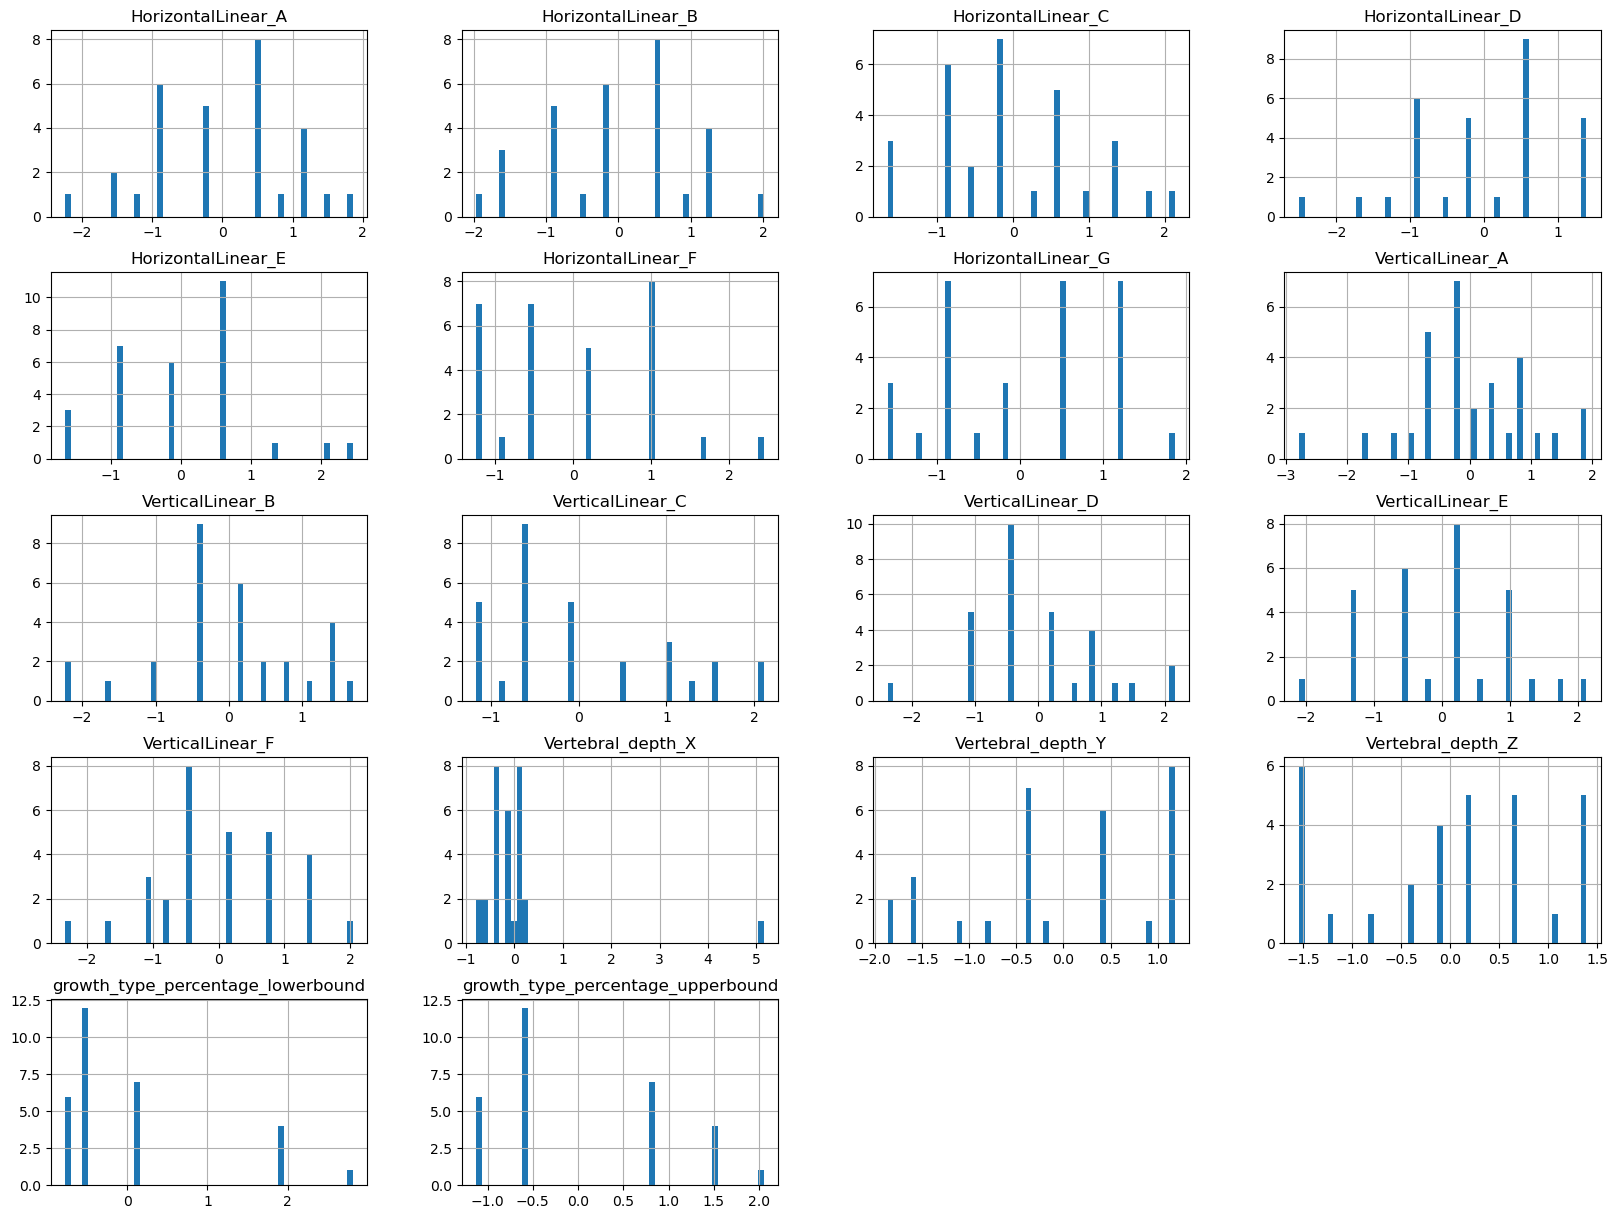

In [48]:
cer_vert_scaled_df.hist(bins=50, figsize=(20,15))
plt.savefig("scaled_attribute_histogram_plots")
plt.show()

### Split the train test data

In [34]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cer_vert_df, test_size=0.2, random_state=42)

##### preparing the data for machine learning model input

In [35]:
# drop labels for training set
train_X = train_set.drop(["growth_type_percentage_lowerbound","growth_type_percentage_upperbound"], axis=1) 
train_labels_lowerBound = train_set["growth_type_percentage_lowerbound"].copy()
train_labels_upperBound = train_set["growth_type_percentage_upperbound"].copy()

In [36]:
# drop labels for test set
test_X = test_set.drop(["growth_type_percentage_lowerbound","growth_type_percentage_upperbound"], axis=1) 
test_labels_lowerBound = test_set["growth_type_percentage_lowerbound"].copy()
test_labels_upperBound = test_set["growth_type_percentage_upperbound"].copy()

#### Selecting  the right model and fine tuning the model

Cross validation can be used for fine tuning the model
- creating multiple folds of data and 
- evaluating a ML model's performance for each set of hyperparameters in each fold of data,
- then looking at the descriptive statistics of model performance of each model over the k folds.

Instead of creating separate k folds, we can leave one out to create each fold, since we have limited data

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg_upper = LinearRegression()
lin_reg.fit(train_X, train_labels_lowerBound)
lin_reg_upper.fit(train_X, train_labels_upperBound)

LinearRegression()

In [38]:
print("Predictions lower bound:", lin_reg.predict(test_X))
print("Predictions upper bound:", lin_reg_upper.predict(test_X))

Predictions lower bound: [ 76.35056959 -15.26255142  60.48785635  21.04761101  26.13289649
   1.92771002]
Predictions upper bound: [102.22540609  -7.53339888  99.6784688   26.15385511  60.37565933
  21.9083747 ]


In [39]:
# comparing against actual values
print("Labels lower bound:", list(test_labels_lowerBound))
print("Labels upper bound:", list(test_labels_upperBound))

Labels lower bound: [65, 10, 85, 10, 25, 5]
Labels upper bound: [85, 25, 100, 25, 65, 10]


### Error measurement

In [41]:
from sklearn.metrics import mean_squared_error

growth_prediction_lowerbound = lin_reg.predict(test_X)
lin_mse = mean_squared_error(test_labels_lowerBound, growth_prediction_lowerbound)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(test_labels_lowerBound, growth_prediction_lowerbound)
lin_mae

12.729677024165982

### Trying another model: Decision Tree regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_X, train_labels_lowerBound)

tree_reg_upper = DecisionTreeRegressor(random_state=42)
tree_reg_upper.fit(train_X, train_labels_upperBound)

DecisionTreeRegressor(random_state=42)

In [44]:
growth_predictions_lower_dtree = tree_reg.predict(test_X)
tree_mse = mean_squared_error(test_labels_lowerBound, growth_predictions_lower_dtree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

12.0761472884912

In [45]:
growth_predictions_upper_dtree = tree_reg_upper.predict(test_X)
tree_mse = mean_squared_error(test_labels_upperBound, growth_predictions_upper_dtree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

44.44097208657794

#### RandomForest

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_X, train_labels_lowerBound)

RandomForestRegressor(random_state=42)

In [47]:
growth_predictions_lower_rf = forest_reg.predict(test_X)
forest_mse = mean_squared_error(test_labels_lowerBound, growth_predictions_lower_rf)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

20.206620202300037